In [1]:
#!/usr/bin/env python

import os, sys, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from utils import dlc_practical_prologue as prologue
from utils.helpers import train_model
from utils.plot import plot_history
from utils.data import data_format
from utils.metrics import compute_nb_errors

from models.proj1.weight_sharing import WeightSharing, NetSharing1
from models.proj1.basic import Net1, Net3

import torch
from torch import optim

In [2]:
# load the data
x_train, y_train, c_train, x_test, y_test, c_test = prologue.generate_pair_sets(nb=1000)

/home/mbanga/.pyenv/versions/deeplearning/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/mbanga/.pyenv/versions/deeplearning/lib/python3.7/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/mbanga/.pyenv/versions/deeplearning/lib/python3.7/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/mbanga/.pyenv/versions/deeplearning/lib/python3.7/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [3]:
def summary(model, history, batch_size=None):
    print('model: {:>5}, criterion: {:>10}, optimizer: {:>10}, learning rate: {:6}, num epochs: {:3}, '
    'batch size: {:3}, training time: {:5.2f}, train error: {:5.2f}%, test error: {:5.2f}%'.format(
        history.model['name'],
        history.model['criterion'],
        history.model['optim'].__class__.__name__,
        history.model['optim'].param_groups[0]['lr'],
        history.epochs,
        batch_size,
        history.training_time,
        compute_nb_errors(model, x_train, y_train, batch_size) / x_train.size(0) * 100,
        compute_nb_errors(model, x_test, y_test, batch_size) / x_test.size(0) * 100
        )
    )

In [4]:
# Parameters
n_epochs = 50
batch_size = 100
models = [WeightSharing, NetSharing1, Net1]
opts = [torch.optim.SGD, torch.optim.Adam]
lrs = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

In [5]:
histories = []
for m in models:
    model = m()
    data = ((x_train, y_train, c_train), (x_test, y_test, c_test))
    (x_train, y_train, c_train), (x_test, y_test, c_test) = data_format(model, data)
    for opt in opts[:1]:
        for lr in lrs[:1]:
            # Define optimizer
            opt = opt(model.parameters(), lr=lr)
            # train model
            history = train_model(model, opt, n_epochs, x_train, y_train, batch_size)
            # print stats
            summary(model, history, batch_size=batch_size) 
            # save history
            histories.append(history)

model: WeightSharing, criterion: BCEWithLogitsLoss, optimizer:        SGD, learning rate:    0.1, num epochs:  50, batch size: 100, training time: 10.04, train error:  3.40%, test error: 14.40%
model: NetSharing1, criterion: CrossEntropyLoss, optimizer:        SGD, learning rate:    0.1, num epochs:  50, batch size: 100, training time:  9.49, train error:  3.10%, test error: 13.20%
model:  Net1, criterion: CrossEntropyLoss, optimizer:        SGD, learning rate:    0.1, num epochs:  50, batch size: 100, training time:  5.28, train error:  4.50%, test error: 17.40%


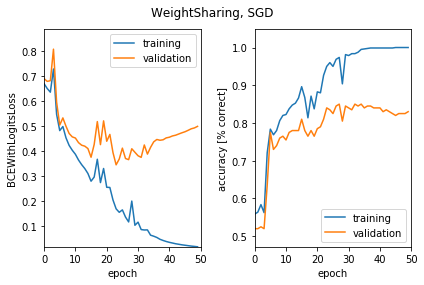

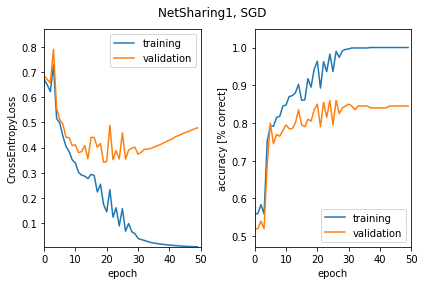

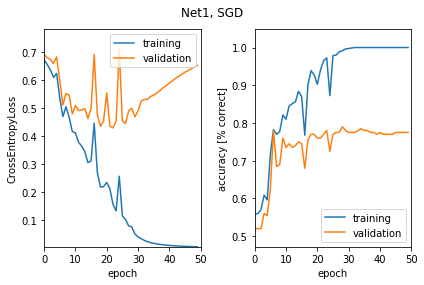

In [6]:
for history in histories:
    title = '{}, {}'.format(history.model['name'], history.model['optim'].__class__.__name__)
    res = plot_history(history, title=title)

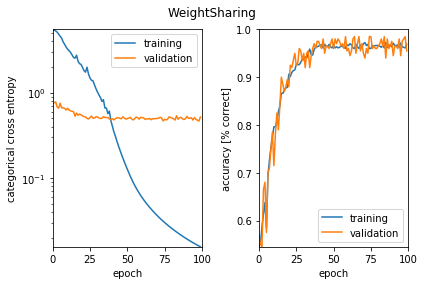

In [272]:
res = plot_history(mean_history([history], NB_EPOCHS), 'WeightSharing', NB_EPOCHS)